### Classifying cells based on inflextion point threshold

In [40]:
#Classify the cells based on where their cd73 expression intensity falls compared 
#to the inflection point threshold calculated in find_inflection_point.ipynb

import pandas as pd
import numpy as np

# Read the excel file
file_path = '/Users/pegaheizad/Desktop/Ghosh_lab/data_files/cd73_data.xlsx'
df = pd.read_excel(file_path)

# get the data from the intensity column
# this data includes both soft and TCP and P3 & P5
cd73_data = df['Intensity_MeanIntensity_cells']

# inflection point intensity calculated in find_inflection_point.ipynb
threshold = 0.007380481

# sort values based on the 40th percentile from median threshold
above_threshold = df[df['Intensity_MeanIntensity_cells'] > threshold]
below_or_equal_threshold = df[df['Intensity_MeanIntensity_cells'] <= threshold]

# Print results to check
print(f"how many values above the threshold:\n{len(above_threshold)}")
print(f"how many values below or equal to the threshold:\n{len(below_or_equal_threshold)}")

# take a segment of the data for the ML
above_threshold_data_for_ML = above_threshold.head(7500)
below_or_equal_threshold_data_for_ML = below_or_equal_threshold.head(7000)

combined_data = pd.concat([above_threshold_data_for_ML, below_or_equal_threshold_data_for_ML])
combined_data.to_excel("/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_intensity_classified.xlsx", index=False)



how many values above the threshold:
8927
how many values below or equal to the threshold:
7565


### classify based on intensity threshold and make the two groups the highest and lowest intensities

In [25]:
highest_3k_above_threshold = above_threshold.sort_values(by='Intensity_MeanIntensity_cells', ascending=False).head(3000)
lowest_3k_below_threshold = below_or_equal_threshold.sort_values(by='Intensity_MeanIntensity_cells', ascending=True).head(3000)

# Concatenate the two datasets
combined_data = pd.concat([highest_3k_above_threshold, lowest_3k_below_threshold])

# Write the combined data into an Excel file
combined_data.to_excel("/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_highest_lowest_3k_intensities.xlsx", index=False)

In [14]:
highest_above_threshold = above_threshold.sort_values(by='Intensity_MeanIntensity_cells', ascending=False).head(7000)
lowest_below_threshold = below_or_equal_threshold.sort_values(by='Intensity_MeanIntensity_cells', ascending=True).head(7000)

# Concatenate the two datasets
combined_data = pd.concat([highest_above_threshold, lowest_below_threshold])

# Write the combined data into an Excel file
combined_data.to_excel("/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_highest_lowest_intensities.xlsx", index=False)

In [ ]:
highest_above_threshold = above_threshold.sort_values(by='Intensity_MeanIntensity_cells', ascending=False).head(7000)
lowest_below_threshold = below_or_equal_threshold.sort_values(by='Intensity_MeanIntensity_cells', ascending=True).head(7000)

# Concatenate the two datasets
combined_data = pd.concat([highest_above_threshold, lowest_below_threshold])

# Write the combined data into an Excel file
combined_data.to_excel("/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_highest_lowest_intensities.xlsx", index=False)

In [5]:
# Concatenate the two datasets
combined_data = pd.concat([above_threshold_data_for_ML, below_or_equal_threshold_data_for_ML])

# Write the combined data into an Excel file
combined_data.to_excel("/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_threshold_sorted.xlsx", index=False)

## Classsify based on growing surface

In [8]:
# classify based on soft vs TCP 
soft = df[df['Metadata_GrowingSurface'] == 'soft']
tcp = df[df['Metadata_GrowingSurface'] == 'TCP']

# print results to check
print(f'how many values in the soft category: {len(soft)}')
print(f'how many values in the TCP category: {len(tcp)}')

soft_data_for_ML = soft.head(5500)
tcp_data_for_ML = tcp.head(5000)

combined_data = pd.concat([soft_data_for_ML, tcp_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_growing_surface_sorted.xlsx', index=False)

how many values in the soft category: 10753
how many values in the TCP category: 5739


### P5 527 vs P5 TCP

In [35]:
# classify based on soft vs TCP 
p5_soft = df[(df['Metadata_Passage'] == 5) & (df['Metadata_GrowingSurface'] == 'soft')]
p5_tcp = df[(df['Metadata_Passage'] == 5) & (df['Metadata_GrowingSurface'] == 'TCP')]

# print results to check
print(f'how many values in the soft category: {len(p5_soft)}')
print(f'how many values in the TCP category: {len(p5_tcp)}')

p5_soft_data_for_ML = p5_soft.head(2000)
p5_tcp_data_for_ML = p5_tcp.head(2150)

combined_data = pd.concat([p5_soft_data_for_ML, p5_tcp_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_p5_growing_surface_sorted.xlsx', index=False)

how many values in the soft category: 6567
how many values in the TCP category: 2150


### P3 527 vs TCP

In [34]:
# classify based on soft vs TCP 
p3_soft = df[(df['Metadata_Passage'] == 3) & (df['Metadata_GrowingSurface'] == 'soft')]
p3_tcp = df[(df['Metadata_Passage'] == 3) & (df['Metadata_GrowingSurface'] == 'TCP')]

# print results to check
print(f'how many values in the soft category: {len(p3_soft)}')
print(f'how many values in the TCP category: {len(p3_tcp)}')

p3_soft_data_for_ML = p3_soft.head(3500)
p3_tcp_data_for_ML = p3_tcp.head(3589)

combined_data = pd.concat([p3_soft_data_for_ML, p3_tcp_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_p3_growing_surface_sorted.xlsx', index=False)

how many values in the soft category: 4186
how many values in the TCP category: 3589


### Classifying cells based on passage

In [12]:
# classify based on P3 vs P5 
p3 = df[df['Metadata_Passage'] == 3]
p5 = df[df['Metadata_Passage'] == 5]

# print results to check
print(f'how many values in the P3 category: {len(p3)}')
print(f'how many values in the P5 category: {len(p5)}')

p3_data_for_ML = p3.head(7500)
p5_data_for_ML = p5.head(8000)

combined_data = pd.concat([p3_data_for_ML, p5_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_passage_sorted.xlsx', index=False)

how many values in the P3 category: 7775
how many values in the P5 category: 8717


### TCP P5 vs P3

In [17]:
p5_tcp = df[(df['Metadata_GrowingSurface'] == 'TCP') & (df['Metadata_Passage'] == 5)]
p3_tcp = df[(df['Metadata_GrowingSurface'] == 'TCP') & (df['Metadata_Passage'] == 3)]

# print results to check
print(f'how many values in the P3 category: {len(p5_tcp)}')
print(f'how many values in the P5 category: {len(p3_tcp)}')

p5TCP_data_for_ML = p5_tcp.head(2100)
p3TCP_data_for_ML = p3_tcp.head(2500)

combined_data = pd.concat([p5TCP_data_for_ML, p3TCP_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_p5tcp_p3tcp.xlsx', index=False)


how many values in the P3 category: 2150
how many values in the P5 category: 3589


In [19]:
p5_527 = df[(df['Metadata_GrowingSurface'] == 'soft') & (df['Metadata_Passage'] == 5)]
p3_527 = df[(df['Metadata_GrowingSurface'] == 'soft') & (df['Metadata_Passage'] == 3)]

# print results to check
print(f'how many values in the P3 category: {len(p5_527)}')
print(f'how many values in the P5 category: {len(p3_527)}')

p5_527_data_for_ML = p5_527.head(4100)
p3_527_data_for_ML = p3_527.head(4000)

combined_data = pd.concat([p5_527_data_for_ML, p3_527_data_for_ML])
combined_data.to_excel('/Users/pegaheizad/Desktop/Ghosh_lab/data_files/ML_cd73_data_p5soft_p3soft.xlsx', index=False)

how many values in the P3 category: 6567
how many values in the P5 category: 4186


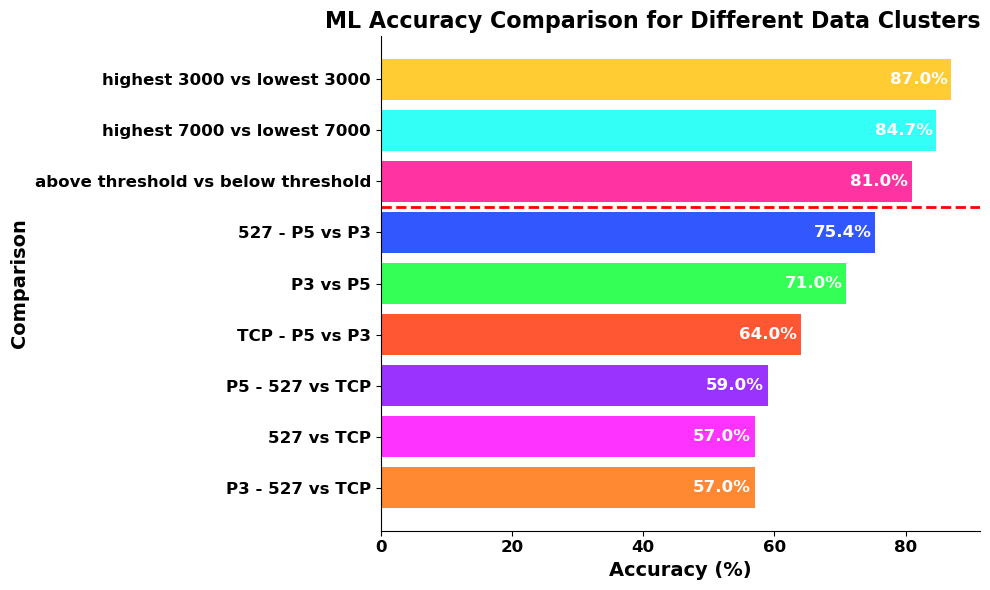

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data, including the new group
new_data = {
    'Comparison': ['highest 3000 vs lowest 3000', 'P5 - 527 vs TCP', 'P3 - 527 vs TCP', '527 vs TCP', 'P3 vs P5', 'highest 7000 vs lowest 7000', 'TCP - P5 vs P3', '527 - P5 vs P3', 'above threshold vs below threshold'],
    'Accuracy': [87, 59, 57, 57, 71, 84.7, 64, 75.4, 81]
}

# Create a DataFrame with the new group
df_new = pd.DataFrame(new_data)

# Sort the DataFrame by Accuracy
df_new = df_new.sort_values(by='Accuracy')

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_new['Comparison'], df_new['Accuracy'], color=['#FF8833','#FF33FF', '#9B33FF', '#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF7', '#FFCC33'])

# Add larger and bold labels with the new title
plt.xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.ylabel('Comparison', fontsize=14, fontweight='bold')
plt.title('ML Accuracy Comparison for Different Data Clusters', fontsize=16, fontweight='bold', loc='right')

# Set the y-tick labels (comparisons) to bold
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-tick labels (numbers) to bold
plt.xticks(fontsize=12, fontweight='bold')

# Display the values on the bars with bold font
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center', ha='center', 
             color='white', fontsize=12, fontweight='bold')

# Add a dotted red line between the two groups
plt.axhline(y=5.5, color='red', linestyle='--', linewidth=2)

# Remove the black border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()
